# IKEA - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv') 

In [3]:
df.shape

(3694, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


# Data Cleaning

In [6]:
df['old_price'].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

In [7]:
df['old_price'] = df['old_price'].str.replace('[A-Za-z ,]', '').replace('', np.nan) # 'No old price' '1,365' '1456/4 pack'
df['old_price'] = df['old_price'].str.replace('/\d','').astype(float) # '1456/4'

In [8]:
df['old_price'].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2375.0,
 nan,
 nan,
 nan,
 295.0,
 nan,
 nan,
 nan,
 175.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 995.0,
 nan,
 nan,
 995.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 1385.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2375.0,
 nan,
 nan,
 1385.0,
 nan,
 nan,
 1385.0,
 nan,
 445.0,
 925.0,
 nan,
 2205.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 895.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2435.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 125.0,
 nan,
 1595.0,
 2880.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 940.0,
 nan,
 nan,
 nan,
 800.0,
 nan,
 nan,
 nan,
 nan,
 1995.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3245.0,
 nan,
 8735.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2310.0,
 nan,
 2560.0,
 nan,
 3760.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 3130.0,
 nan,
 nan,
 9745.0,
 nan,
 nan,
 1885.0,
 445.0,
 nan,
 nan,
 nan,


In [40]:
df = df.drop(columns = ['Unnamed: 0', 'item_id'])

# Descriptive Statistics

In [10]:
# Types of Data
df.dtypes

name                  object
category              object
price                float64
old_price            float64
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [11]:
df.describe()

,price,old_price,depth,height,width
count,3694.000000,654.000000,2231.000000,2706.000000,3105.000000
mean,1078.208419,1624.577982,54.379202,101.679970,104.470853
std,1374.652494,1780.322504,29.958351,61.097585,71.133771
min,3.000000,7.000000,1.000000,1.000000,1.000000
25%,180.900000,412.500000,38.000000,67.000000,60.000000
50%,544.700000,1026.500000,47.000000,83.000000,80.000000
75%,1429.500000,2158.750000,60.000000,124.000000,140.000000
max,9585.000000,9985.000000,257.000000,700.000000,420.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3694 non-null   object 
 1   category           3694 non-null   object 
 2   price              3694 non-null   float64
 3   old_price          654 non-null    float64
 4   sellable_online    3694 non-null   bool   
 5   link               3694 non-null   object 
 6   other_colors       3694 non-null   object 
 7   short_description  3694 non-null   object 
 8   designer           3694 non-null   object 
 9   depth              2231 non-null   float64
 10  height             2706 non-null   float64
 11  width              3105 non-null   float64
dtypes: bool(1), float64(5), object(6)
memory usage: 234.5+ KB


In [13]:
# mean and median value of price column
print(df['price'].mean())
df['price'].median()

1078.208419057932


544.7

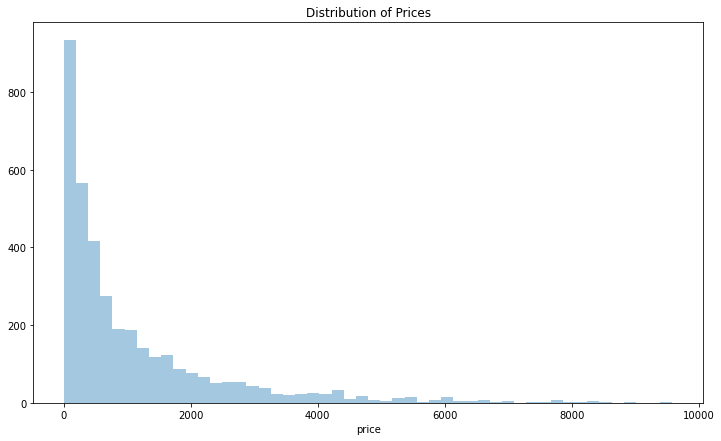

In [14]:
plt.subplots(figsize = (12,7)) # determine size of figure
sns.distplot(df['price'], kde=False)
plt.title('Distribution of Prices')
plt.show()

In [15]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

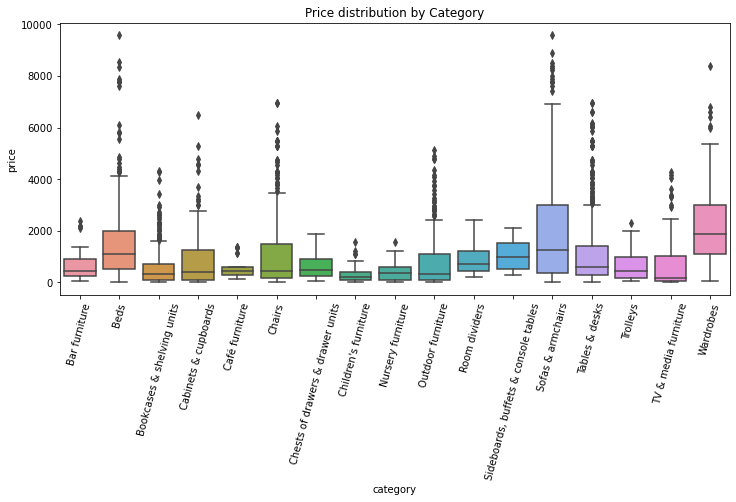

In [16]:
plt.subplots(figsize = (12,5)) # determine size of figure
sns.boxplot(x = 'category', y = 'price', data = df)
plt.xticks(rotation = 75) # set x labels 75°
plt.title('Price distribution by Category') # set title of chart
plt.show()

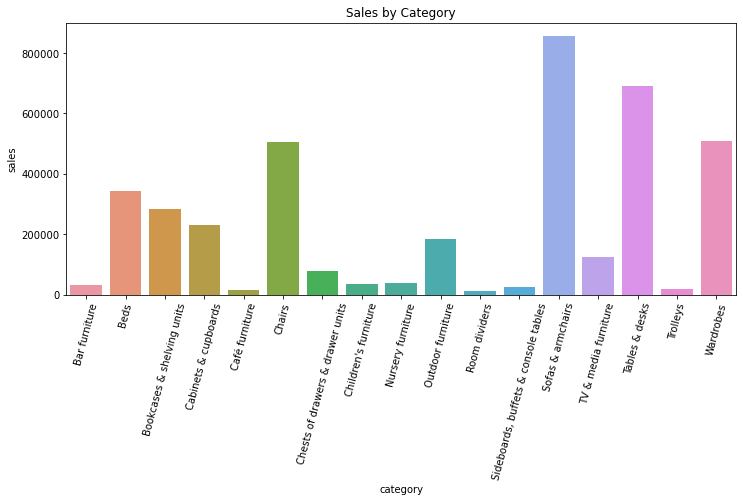

In [17]:
df1 = df.groupby(['category']).agg(sales = ('price', 'sum'))
# Total Sales per Category

plt.subplots(figsize = (12, 5))
sns.barplot(x = df1.index, y = 'sales', data = df1)
plt.xticks(rotation = 75) # set x labels 75°
plt.title('Sales by Category')
plt.show()

In [18]:
# name, category, price and designer of MOST expensive furniture
df[df['price'] == df['price'].max()][['name', 'category', 'price', 'designer']]

,name,category,price,designer
190,LIDHULT,Beds,9585.0,Henrik Preutz/IKEA of Sweden
2344,LIDHULT,Sofas & armchairs,9585.0,Henrik Preutz/IKEA of Sweden


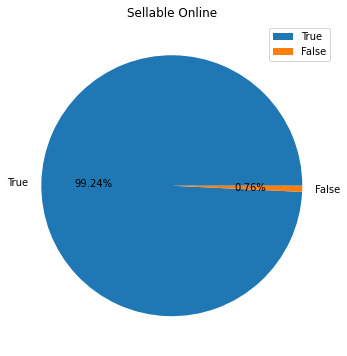

In [19]:
# number of possible online sales
df2 = df['sellable_online'].value_counts()

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(df2, labels = df2.index, autopct='%1.2f%%')
plt.title('Sellable Online')
plt.legend()
plt.show()

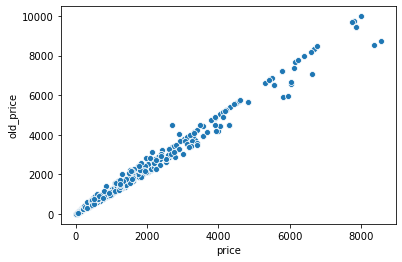

In [20]:
sns.scatterplot(data = df,  x = 'price', y = 'old_price')
plt.show()

In [41]:
df['size'] = df['width'] * df['depth']*df['height']
df.head()

,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,size
0,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,NaN
1,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,NaN
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,NaN
3,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0
4,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0


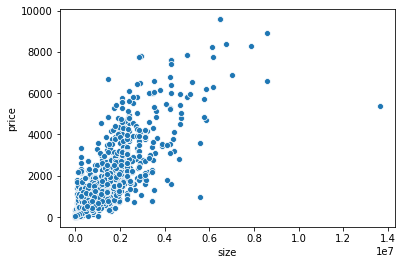

In [22]:
sns.scatterplot(data = df,  x = 'size', y = 'price')
plt.show()

In [44]:
from scipy.stats import pearsonr
df = df.dropna(subset = ['size']) # We can't use Pearson test if there are Nans or infs in the data
pearsonr(df['size'], df['price']) # Pearson’s correlation coefficient

(0.8305755969257603, 0.0)

In [42]:
X = df.groupby(['other_colors']).agg(avg = ('price', 'mean'))
X

,avg
other_colors,
No,983.335518
Yes,1215.121561


In [43]:
from scipy.stats import chi2_contingency
chi2_contingency(X)
# Returns The test statistic, p-value, Degrees of freedom, The expected frequencies

(0.0,
 1.0,
 0,
 array([[ 983.33551787],
        [1215.12156085]]))

In [26]:
df.head(10)

,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,size
3,STIG,Bar furniture,69.0,NaN,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0
4,NORBERG,Bar furniture,225.0,NaN,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0
5,INGOLF,Bar furniture,345.0,NaN,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0,163800.0
6,FRANKLIN,Bar furniture,129.0,NaN,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,209000.0
8,FRANKLIN,Bar furniture,129.0,NaN,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,209000.0
10,FRANKLIN,Bar furniture,149.0,NaN,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,103.0,52.0,235664.0
11,INGOLF,Bar furniture,395.0,NaN,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 74 cm",Carina Bengs,45.0,102.0,40.0,183600.0
12,NORRARYD,Bar furniture,395.0,NaN,True,https://www.ikea.com/sa/en/p/norraryd-bar-stoo...,No,"Bar stool with backrest, 74 cm",Nike Karlsson,47.0,103.0,46.0,222686.0
13,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,237016.0
14,EKEDALEN,Bar furniture,345.0,NaN,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehlén Johansson,52.0,114.0,43.0,254904.0


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv') 
df['size'] = df['width'] * df['depth']*df['height']
df['old_price'] = df['old_price'].str.replace('[A-Za-z ,]', '').replace('', np.nan) # 'No old price' '1,365' '1456/4 pack'
df['old_price'] = df['old_price'].str.replace('/\d','').astype(float) # '1456/4'

# Data Modeling

In [28]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width', 'size'],
      dtype='object')

In [29]:
df = df.drop(columns = ['Unnamed: 0', 'item_id', 'link', 'short_description', 'depth', 'height', 'width'])
df

,name,category,price,old_price,sellable_online,other_colors,designer,size
0,FREKVENS,Bar furniture,265.0,NaN,True,No,Nicholai Wiig Hansen,NaN
1,NORDVIKEN,Bar furniture,995.0,NaN,False,No,Francis Cayouette,NaN
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,NaN,False,No,Francis Cayouette,NaN
3,STIG,Bar furniture,69.0,NaN,True,Yes,Henrik Preutz,300000.0
4,NORBERG,Bar furniture,225.0,NaN,True,No,Marcus Arvonen,190920.0
...,...,...,...,...,...,...,...,...
3689,ELVARLI,Wardrobes,750.0,820.0,True,No,Ehlén Johansson,NaN
3690,ELVARLI,Wardrobes,1572.0,1755.0,True,No,Ehlén Johansson,NaN
3691,ELVARLI,Wardrobes,924.0,1050.0,True,No,Ehlén Johansson,NaN
3692,ELVARLI,Wardrobes,2745.0,3130.0,True,No,Ehlén Johansson,NaN


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score

In [31]:
X = df[['name', 'category', 'old_price', 'sellable_online', 'other_colors', 'designer', 'size']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
numeric_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one', OneHotEncoder(handle_unknown = 'ignore'))
])

column_preprocessing = ColumnTransformer(transformers = [
    ('numeric', numeric_transformer, ['old_price', 'size']),
    ('categorical', categorical_transformer, ['category', 'name', 'sellable_online', 'other_colors', 'designer'])
])

model = Pipeline(steps = [
    ('preprocessing', column_preprocessing),
    ('regressor', KNeighborsRegressor(n_neighbors = 5))
])

model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

515368.6472619047

In [36]:
gridsearch = GridSearchCV(estimator=model,
                          param_grid={
                              'regressor__n_neighbors': [3, 5, 15, 20, 30, 50, 70],
                              'preprocessing__numeric__impute':['mean', 'median'],
                              'preprocessing__categorical__impute':['most_frequent', 'constant']
                          })
gridsearch.fit(X_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 808, in dispatch_one_batch
    tasks = self._ready_batches.get(block=False)
  File "c:\users\user\appdata\local\programs\python\python38-32\lib\queue.py", line 167, in get
    raise Empty
_queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'mean' (type <class 'str'>) doesn't

In [37]:
gridsearch.best_params_

{'preprocessing__categorical__impute': 'most_frequent',
 'preprocessing__numeric__impute': 'mean',
 'regressor__n_neighbors': 3}

In [38]:
numeric_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one', OneHotEncoder(handle_unknown = 'ignore'))
])

column_preprocessing = ColumnTransformer(transformers = [
    ('numeric', numeric_transformer, ['old_price', 'size']),
    ('categorical', categorical_transformer, ['category', 'name', 'sellable_online', 'other_colors', 'designer'])
])

model = Pipeline(steps = [
    ('preprocessing', column_preprocessing),
    ('regressor', KNeighborsRegressor(n_neighbors = 3))
])

model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

498432.7938744588